# Exploratory Analysis of Working VCF File for GCDT Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



## In this notebook explore the exploratory stats of working VCF file that was applied the following filters
    1. Biallelic Markers
    2. Average Read Quality Score (>=40)
    3. Minimun Depht >=3 reads
    4. Missingness by sample (<= 83%)
    5. Genotype calls by marker (>= 99 samples)
    6. Minor allele frquency  (>=2%)
    7. Maximum Heterozygosity (<=2%)

In [3]:
imiss = pd.read_csv('./../results/missingness.imiss', sep='\s+')
imiss = imiss.sort_values('F_MISS', ascending=True)
imiss.head()

,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS
185,GCDT_216,GCDT_216,Y,458,36839,0.01243
64,GCDT_071,GCDT_071,Y,717,36839,0.01946
263,ICTA_LIGERO,ICTA_LIGERO,Y,774,36839,0.02101
118,GCDT_139,GCDT_139,Y,792,36839,0.02150
187,GCDT_218,GCDT_218,Y,1075,36839,0.02918


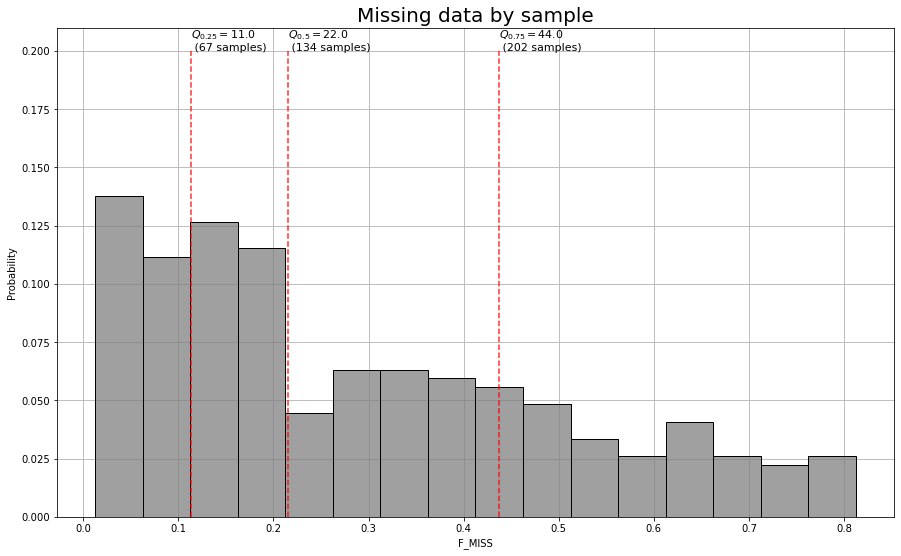

In [17]:
#Missingness per sample indicating quantile values
w = 15
h = 9
fig = plt.figure(figsize=(w,h))
ax = fig.add_subplot(111)
sns.histplot(x="F_MISS", binwidth=0.05,data=imiss,ax=ax,stat='probability', cumulative=False, color='gray')
percentiles = np.quantile(imiss.F_MISS, [0.25,0.5,0.75])
values = np.zeros(percentiles.shape)+0.2

for x,y,q in zip(percentiles, values,[0.25,0.5,0.75]):
    ax.plot([x,x],[0,y], 'r--', alpha=0.8)
    ax.text(x,y,'$Q_{%s} = %s$\n (%s samples)' %(round(q,2), round(x,2)*100,round(imiss.shape[0]*q)), size=11)

ax.set_axisbelow(True)
ax.grid()


ax.set_title('Missing data by sample', size=20)

plt.savefig('./../results/GCDT_Missing_per_sample.png')

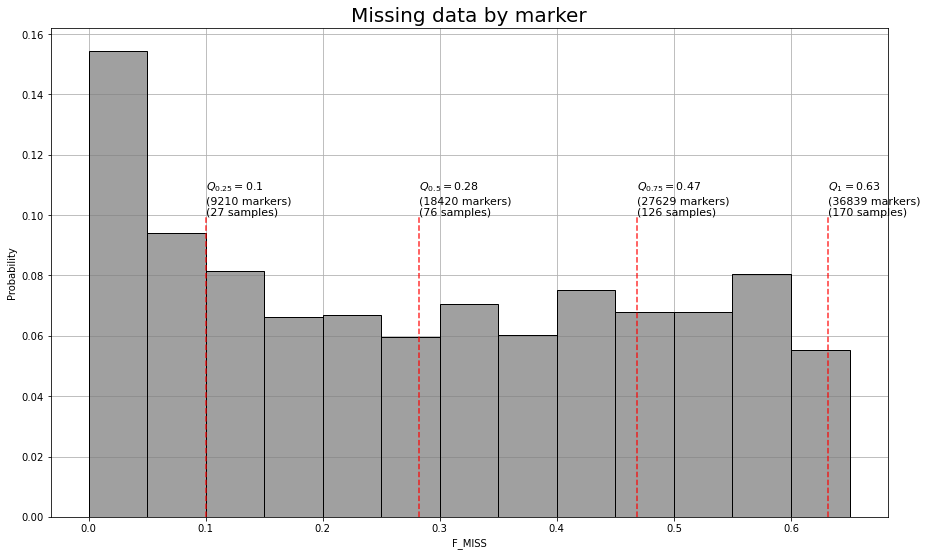

In [18]:
lmiss = pd.read_csv('./../results/missingness.lmiss', sep='\s+')

w = 15
h = 9
fig = plt.figure(figsize=(w,h))
ax = fig.add_subplot(111)
sns.histplot(x="F_MISS", binwidth=0.05,data=lmiss,ax=ax,stat='probability', cumulative=False, color='gray')

percentiles = np.quantile(lmiss.F_MISS, [0.25,0.5,0.75,1])
values = np.zeros(percentiles.shape)+0.1

for x,y,q in zip(percentiles, values,[0.25,0.5,0.75,1]):
    ax.plot([x,x],[0,y], 'r--', alpha=0.8)
    ax.text(x,y,'$Q_{%s} = %s$\n(%s markers)\n(%s samples)' %(round(q,2), round(x,2),round(lmiss.shape[0]*q),round(imiss.shape[0]*x)), size=11)
ax.set_axisbelow(True)
ax.grid()
ax.set_title('Missing data by marker', size=20)
plt.savefig('./../results/GCDT_Missing_per_marker.png')

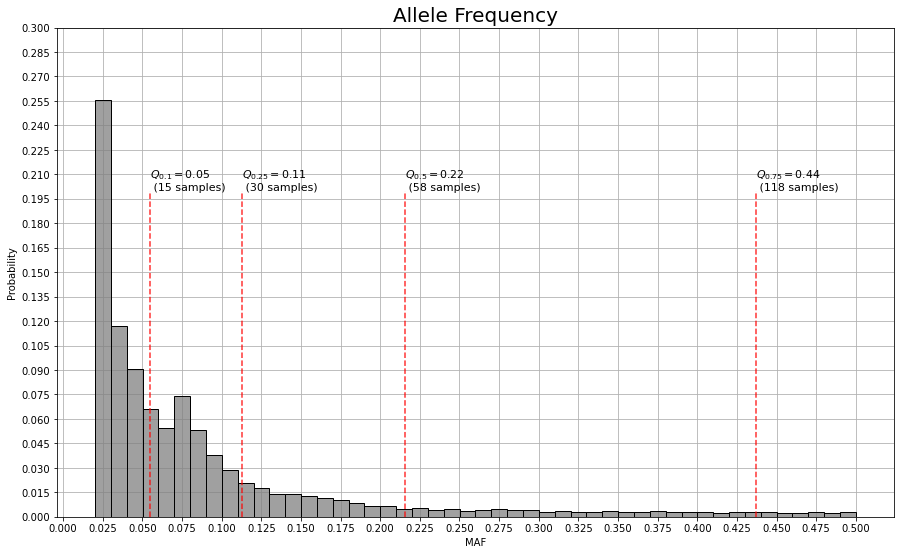

In [21]:
freq = pd.read_csv('./../results/allele_freqs.frq', sep='\s+')

w = 15
h = 9

fig = plt.figure(figsize=(w,h))
ax = fig.add_subplot(111)
sns.histplot(x="MAF", binwidth=0.01,data=freq,ax=ax,stat='probability', cumulative=False, color='gray')

percentiles = np.quantile(imiss.F_MISS, [0.1, 0.25,0.5,0.75])
values = np.zeros(percentiles.shape)+0.2

for x,y,q in zip(percentiles, values,[0.1, 0.25,0.5,0.75]):
    ax.plot([x,x],[0,y], 'r--', alpha=0.8)
    ax.text(x,y,'$Q_{%s} = %s$\n (%s samples)' %(round(q,2), round(x,2),round(imiss.shape[0]*x)), size=11)

ax.set_xticks(np.linspace(0,0.5,21))
ax.set_yticks(np.linspace(0,0.3,21))
ax.set_axisbelow(True)
ax.grid()
ax.set_title('Allele Frequency', size=20)

plt.savefig('./../results/GCDT_Allele_frequency.png')

In [22]:
map_data = pd.read_csv('./../processed_data/GCDT_plates_fix_Vulgaris_v2_Bi_Q40_Dp3_imiss83_NS99_MAF2_He2_annotated.map', sep='\s+', header=None)
map_data.columns = ['CHROM', 'ID', 'GPos', 'Pos']
differences = list()
for i, sdf in map_data.groupby('CHROM'):
    d = sdf.Pos.diff()
    midPos = sdf.Pos.rolling(window=2).mean()
    data = {'dist':d.iloc[1:], 
            'midPos':midPos.iloc[1:]}
    dchrom = pd.DataFrame(data=data)
    dchrom['CHROM'] = 'Chrom_%s' % i
    differences.append(dchrom)
dfDiff = pd.concat(differences)
dfDiff = dfDiff[dfDiff['dist'] > 0]

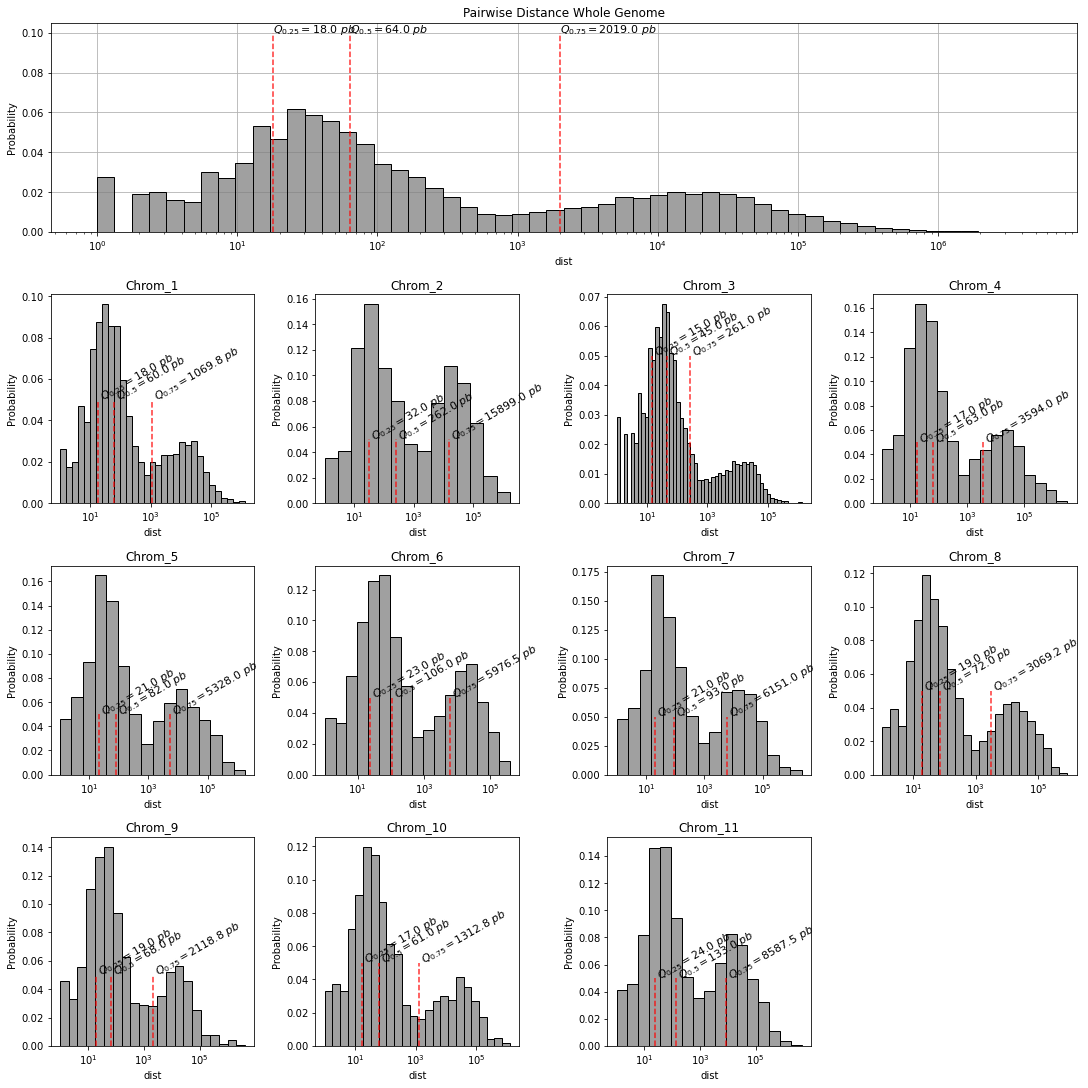

In [27]:
from matplotlib.gridspec import GridSpec
w = 15
h = 15
fig = plt.figure(constrained_layout=True, figsize=(w,h))
gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
axes = dict()
chrom = 1
for row in range(3):
    for col in range(4):
        key = 'Chrom_%s'%chrom
        axes[key] = fig.add_subplot(gs[row+1, col])
        if key == 'Chrom_11':
            break
        chrom += 1
    

sns.histplot(x="dist",data=dfDiff,ax=ax1,stat='probability', cumulative=False, color='gray', log_scale=True)

percentiles = np.quantile(dfDiff.dist, [0.25,0.5,0.75])
values = np.zeros(percentiles.shape)+0.1

for x,y,q in zip(percentiles, values,[0.25,0.5,0.75]):
    ax1.plot([x,x],[0,y], 'r--', alpha=0.8)
    ax1.text(x,y,'$Q_{%s} = %s\ pb$' %(round(q,2), round(x,2)), size=11)
ax1.set_axisbelow(True)
ax1.grid()
ax1.set_title('Pairwise Distance Whole Genome')
chrom = 1
for row in range(3):
    for col in range(4):
        key = 'Chrom_%s'%chrom
        chDf = dfDiff[dfDiff.CHROM == key]
        ax = axes[key]
        sns.histplot(x="dist",data=chDf,ax=ax,stat='probability', cumulative=False, color='gray', log_scale=True)
        percentiles = np.quantile(chDf.dist, [0.25,0.5,0.75])
        values = np.zeros(percentiles.shape)+0.05
        for x,y,q in zip(percentiles, values,[0.25,0.5,0.75]):
            ax.plot([x,x],[0,y], 'r--', alpha=0.8)
            ax.text(x,y,'$Q_{%s} = %s\ pb$' %(round(q,2), round(x,1)), size=11, rotation=30)
            ax.set_title(key)
        if key == 'Chrom_11':
            break
        chrom += 1


plt.savefig('./../results/GCDT_marker_distance.png')